In [2]:
from skimage import data

In [3]:
astr = data.astronaut()

In [4]:
import matplotlib.pyplot as plt

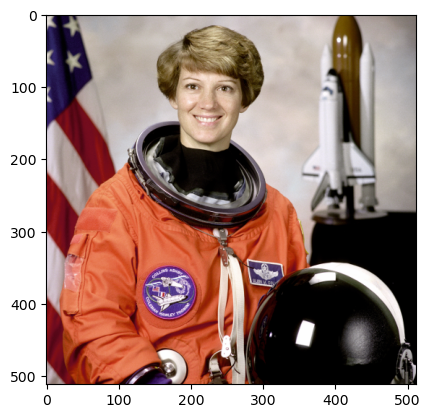

In [5]:
plt.imshow(astr)

In [6]:
#필터의 개념을 보겠다.


In [7]:
from skimage import util

In [11]:
b = util.view_as_blocks(astr, (4,4,3))

In [12]:
b.shape

(128, 128, 1, 4, 4, 3)

In [13]:
#이게 뭘까? 미쳐버림. 

In [14]:
#저 사진을 흑백으로 바꿔보겠다.

In [15]:
from skimage import color

In [17]:
astr_bw = color.rgb2gray(astr)

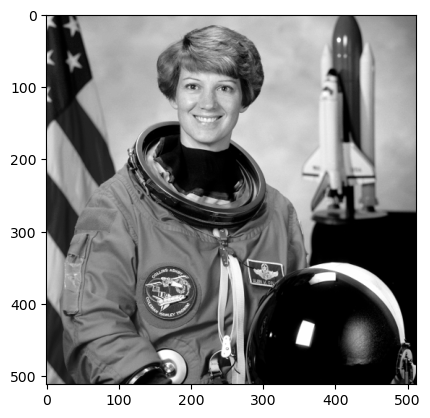

In [18]:
plt.imshow(astr_bw, cmap='gray')

In [19]:
#color 는 3차원이다. 흑백은 2차원도 되고, 3차원도 된다. 

In [20]:
#똑같은 예시를 흑백으로 만들어보겠다.

In [21]:
b = util.view_as_blocks(astr_bw, (4,4))

In [23]:
b.shape

(128, 128, 4, 4)

In [24]:
#block 이 뭔지부터 알아보자. 
# view as blocks 
# block은 겹치지 않게 쪼개는거다.


In [25]:
b_r = b.reshape(128,128,-1)

In [26]:
b_r[0,1]

array([0.30652157, 0.39328784, 0.47729255, 0.53217961, 0.50280902,
       0.56634275, 0.62292627, 0.64952902, 0.64759451, 0.70946863,
       0.72796039, 0.73101882, 0.7663498 , 0.77725922, 0.79182941,
       0.76157294])

In [27]:
b_r.max

<function ndarray.max>

In [28]:
b_r_r = b_r.max(axis=2)

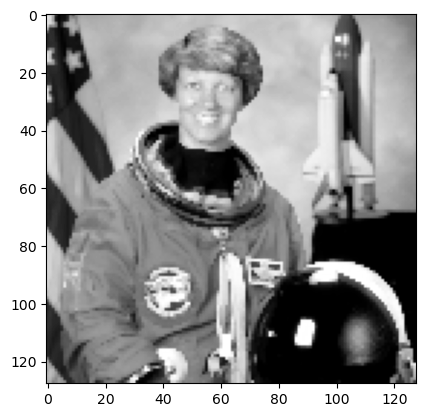

In [29]:
plt.imshow(b_r_r, cmap ='gray')

In [30]:
#크기가 줄어들어서 해상도가 달라진거임. 
# 왜냐면, 우리가 겹치지 않게 잘랐기에. 
# 만약 겹치면서 잘랐다면 훨씬 해상도가 좋아질거다.

In [32]:
w = util.view_as_windows(astr_bw, (4,4))

In [33]:
w.shape

(509, 509, 4, 4)

In [34]:
w_r = w.reshape(509,509,-1)

In [35]:
w_r[0,0]

array([0.5834349 , 0.41485922, 0.24405843, 0.21578902, 0.67558824,
       0.55600667, 0.44905294, 0.4224502 , 0.7663349 , 0.70052431,
       0.64927608, 0.61735294, 0.84027922, 0.8145098 , 0.77923843,
       0.7545851 ])

In [37]:
w_r_r = w_r.mean(axis=2)

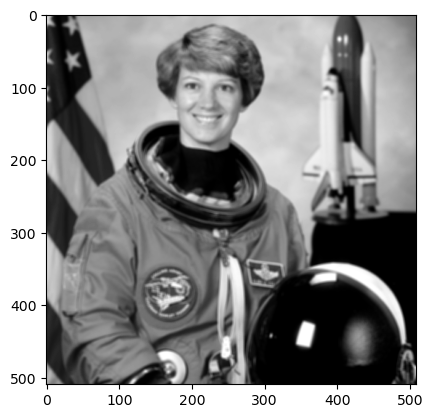

In [38]:
plt.imshow(w_r_r, cmap='gray')

In [39]:
# 이미지가 거의 안 바꼈다. 
# 만약 맥스로 바꾼다면?

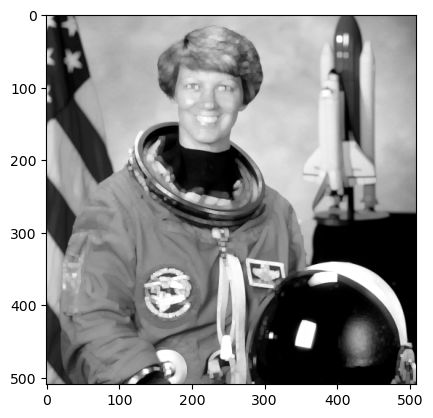

In [41]:
w_r_r = w_r.max(axis=2)
plt.imshow(w_r_r, cmap='gray')

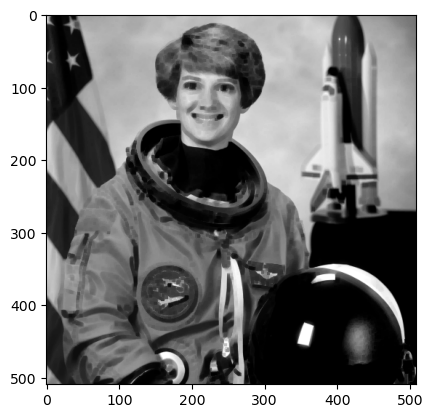

In [42]:
w_r_r = w_r.min(axis=2)
plt.imshow(w_r_r, cmap='gray')

In [43]:
#그러니 저 숫자를 잘 연산하게 만들다면, 원본 이미지를 새로운 이미지로 바꿀 수 있는거다. 
# 이게 우리가 아는 사진 앱의 기본 원리다.

In [44]:
#우리의 핵심은 값을 바꿀때 어떻게 reduction 하는가가 포인트다. 
# 고딩 때 행렬 배우면서도 리덕션 개념을 배웟다고 한다.


In [45]:
import numpy as np

In [47]:
x = np.array([1,2])
y = np.array([1,2])

In [48]:
np.dot(x, y)

5

In [49]:
x = np.array([1,2])
y = np.array([0.3,0.1])

np.dot(x, y)

0.5

In [50]:
# 신호처리에서 많이 사용했다.
from scipy import signal

In [52]:
x = np.array([1,2,3,4,5])
y = np.array([1,-1,2])

In [53]:
signal.correlate(x,y, mode='valid')

array([5, 7, 9])

##### [1,2,3]  [2,3,4]  [3,4,5]   : valid 방식

In [54]:
signal.correlate(x,y, mode='same')

array([ 3,  5,  7,  9, -1])

##### [0,1,2]  [1,2,3]  [2,3,4]  [3,4,5]  [4,5,0]  : same 방식

##### [0,0,1]  [0,1,2]  [1,2,3]  [2,3,4]  [3,4,5]  [4,5,0]  [5,0,0]  : full 방식

# 교환법칙이 성립 안함. correlation 연산은

In [55]:
signal.correlate(y,x, mode='same')

array([9, 7, 5])

In [56]:
#이렇게 바꾸니까 결과가 달라진다.

In [57]:
#correlation 은 convoloution 과 딱 하나 다르다. correlation은 수학적으로 멋진 애라고 하다.

#  convolution 은 교환법칙 성립 함.

In [58]:
x = np.array([1,2,3,4,5])
y = np.array([1,-1,2])

In [61]:
y_ = np.array([2,-1.1])

In [62]:
signal.correlate(y_,x, mode='same')

array([1.6, 0.7])

In [63]:
signal.correlate(y_,x, mode='valid')

array([ 2.5,  1.6,  0.7, -0.2])

In [64]:
signal.correlate(x,y_, mode='same')

array([-1.1, -0.2,  0.7,  1.6,  2.5])